In [1]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:

from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from PIL import Image
#from pywaffle import Waffle
#from catboost import CatBoostClassifier, pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer


In [5]:
pip install --upgrade nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 70.9/70.9 MB 36.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# Check if WordNet data is available and download if not
try:
    nltk.data.find('corpora/wordnet')
    print("found wordnet")
except LookupError:
    nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')

# Update the NLTK data path to include the WordNet data
nltk.data.path.append('/kaggle/working/nltk_data')

# Check if stopwords data is available and download if not

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', download_dir='/kaggle/working/nltk_data')

# Update the NLTK data path to include the stopwords data
nltk.data.path.append('/kaggle/working/nltk_data')



import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import HistGradientBoostingClassifier

import plotly.express as px
import warnings


from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import squarify
from sklearn.metrics import f1_score

#from nltk.corpus import wordnet

# Get synsets for the word "hello" in English WordNet


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
from nltk.corpus import wordnet
sy =wordnet.synsets('hello')
print(wordnet)


<WordNetCorpusReader in 'C:\\Users\\Adarsh\\AppData\\Roaming\\nltk_data\\corpora\\wordnet.zip/wordnet/'>


In [11]:
synsets = wordnet.synsets('extrovert')

# Print synset information
for synset in synsets:
    print(f"Synset name: {synset.name()}")
    print(f"Definition: {synset.definition()}")
    print(f"Examples: {synset.examples()}")
    print()

Synset name: extrovert.n.01
Definition: (psychology) a person concerned more with practical realities than with inner thoughts and feelings
Examples: []

Synset name: extrovert.s.01
Definition: being concerned with the social and physical environment
Examples: []



In [12]:
def sampling(mode, df, col_name, class_names, count):
    """
    Samples the dataframe based on the mode, given class names and count.

    Parameters:
    -----------
    mode: str
        Either 'under' or 'over'
    df : pandas.DataFrame
        Input DataFrame to be undersampled
    col_name : str
        Name of the column containing the target class
    class_names : list
        List of target class names to be undersampled
    count : int
        Number of samples to be kept for each class

    Returns:
    --------
    pandas.DataFrame
        Undersampled DataFrame or Oversampled
    """
    dfs = []
    for class_name in class_names:
        if mode == 'under':
            df_class = df[df[col_name] == class_name]
            if len(df_class) > count:
                df_class = df_class.sample(count, replace=False)
            dfs.append(df_class)
        elif mode == 'over':
            df_class = df[df[col_name] == class_name]
            if len(df_class) < count:
                df_class = df_class.sample(count, replace=True)
            dfs.append(df_class)
    dfs = pd.concat(dfs)
    df_x = df[~df[col_name].isin(class_names)]
    return pd.concat([dfs,df_x])

In [13]:
def get_train(train_data):
    
    X_train = np.vstack(np.array(train_data.posts))
    y_train = np.array(train_data.type)
    
    return X_train, y_train

In [84]:
def split(df, size):
    
    # Cleaning The Data
    df.posts, length = clear_text(df)
    
    #Splitting into train & test
    print("Splitting into train & test")
    train_data,test_data=train_test_split(df,test_size=size,random_state=0,stratify=df.type)
    
    #Applying Tfidf Vectorization
    print("Applying Tfidf Vectorization")
    vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
    vectorizer.fit(train_data.posts)
    
    #Applying the vectorizer transform
    train_post=vectorizer.transform(train_data.posts).toarray()
    test_post=vectorizer.transform(test_data.posts).toarray()
    
    #Label Encoding the classes as 0,1,2,3......
    print("Label Encoding the classes")
    target_encoder= LabelEncoder()
    
    #Getting the final train and test
    print("Getting the final train and test")
    train_target=target_encoder.fit_transform(train_data.type)
    test_target=target_encoder.fit_transform(test_data.type)
    print(target_encoder.classes_)
    return train_post, test_post, train_target, test_target  

In [13]:
def clear_text(df):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    stop_words = set(stopwords.words('english')) # Load stop words
    pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
    pers_types = [p.lower() for p in pers_types]
    
    print("Cleaning The Dataset")
    for sentence in tqdm(df.posts):
        
        sentence=sentence.lower()
        
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
        
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        
        sentence = " ".join([word for word in sentence.split() if word not in stop_words]) # Remove stop words
        #print(len(sentence))
        
        for p in pers_types:
            sentence = re.sub(p, '', sentence)
        #print(len(sentence))
        
        sentence = lemmatizer.lemmatize(sentence) # Lemmatize words
        
        data_length.append(len(sentence.split())) #Split data, measure length of new filtered data
        
        cleaned_text.append(sentence)
        
    return cleaned_text,data_length

In [14]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [90]:
def model(X_train, X_test, y_train, y_test, count):
    models_accuracy={}
    report = {}
    f1_scores={}
    
    #KNN
    print("Running KNN")
    neigh=KNeighborsClassifier()
    neigh.fit(X_train,y_train)
    
    #showing accuracy and f1_scores
    models_accuracy['KNN']=accuracy_score(y_test,neigh.predict(X_test))
    f1_scores['KNN']=f1_score(y_test,neigh.predict(X_test),average='macro')
    
    report['KNN'] = classification_report(y_train,neigh.predict(X_train),zero_division=0)
    

    
    #Logistic Regression
    print("Running Logistic Regression")
    
    model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
    model_log.fit(X_train,y_train)
    
    models_accuracy['Logistic Regression']=accuracy_score(y_test,model_log.predict(X_test))
    f1_scores['Logistic Regression']=f1_score(y_test,model_log.predict(X_test),average='macro')
    
    
    report['Logistic Regression'] = classification_report(y_train,model_log.predict(X_train),zero_division=0)
    
     #Linear SVC
    print("Running Linear SVC")
    model_linear_SVC=LinearSVC(C=0.1)
    model_linear_SVC.fit(X_train,y_train)
    
    models_accuracy['Linear Support Vector Classifier']=accuracy_score(y_test,model_linear_SVC.predict(X_test))
    f1_scores['Linear Support Vector Classifier']=f1_score(y_test,model_linear_SVC.predict(X_test),average='macro')
    
    report['Linear Support Vector Classifier'] = classification_report(y_test,model_linear_SVC.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(count)]),zero_division=0)
    
    
    #SVC
    
    print("Running SVC")
    model_svc=SVC()
    model_svc.fit(X_train,y_train)
    
    models_accuracy['Support Vector classifier']=accuracy_score(y_test,model_svc.predict(X_test))
    f1_scores['Support Vector Classifier']=f1_score(y_test,model_svc.predict(X_test),average='macro')
    
    report['Support Vector classifier'] = classification_report(y_test,model_svc.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(count)]),zero_division=0)
    
    
    #Multinomial Naive Bayes
    
    print("Running Multinomial Naive Bayes")
    model_multinomial_nb=MultinomialNB()
    model_multinomial_nb.fit(X_train,y_train)    
    
    
    models_accuracy['Multinomial Naive Bayes']=accuracy_score(y_test,model_multinomial_nb.predict(X_test))
    f1_scores['Multinomial Naive Bayes']=f1_score(y_test,model_multinomial_nb.predict(X_test),average='macro')
    
    report['Multinomial Naive Bayes'] = classification_report(y_test,model_multinomial_nb.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(count)]),zero_division=0)
    
    
    #Decision Tree Classifier
    print("Running Decision Tree Classifier")
    model_tree=DecisionTreeClassifier(max_depth=14)
    model_tree.fit(X_train,y_train)
    
    models_accuracy['Decision Tree classifier']=accuracy_score(y_test,model_tree.predict(X_test))
    f1_scores['Decision Tree classifier']=f1_score(y_test,model_tree.predict(X_test),average='macro')
    
    
    report['Decision Tree classifier'] = classification_report(y_test,model_tree.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(count)]))
    
    
    #Random Forest
    print("Running Random Forest")
    model_forest=RandomForestClassifier(max_depth=10)
    model_forest.fit(X_train,y_train)
    
    models_accuracy['Random Forest Classifier']=accuracy_score(y_test,model_forest.predict(X_test))
    f1_scores['Random Forest Classifier']=f1_score(y_test,model_forest.predict(X_test),average='macro')
    
    report['Random Forest Classifier'] = classification_report(y_test,model_forest.predict(X_test),target_names=target_encoder.inverse_transform([i for i in range(count)]),zero_division=0)
    
    
    
    accuracy_under=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])
    f1_under=pd.DataFrame(f1_scores.items(),columns=['Models','Test F1 Score'])
    
    return accuracy_under, report, f1_under


In [15]:
import pandas as pd

file_path = r'C:\Users\Adarsh\Downloads\mbti_1.csv'
df = pd.read_csv(file_path)


In [16]:
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [17]:
df.shape

(8675, 2)

In [18]:
df.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [19]:
df['type'].value_counts()


INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [20]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

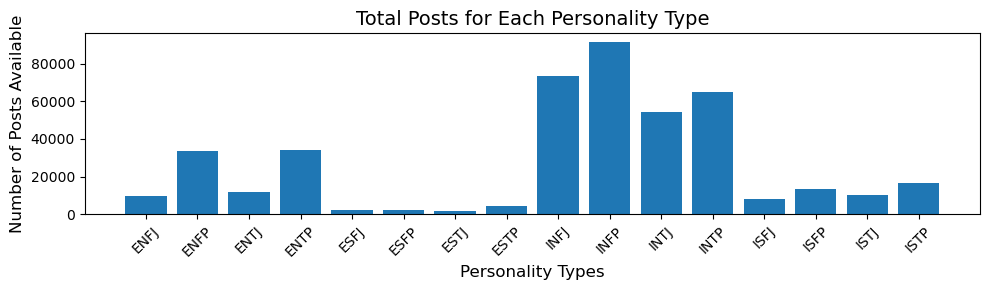

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
total = df.groupby(['type']).count() * 50

plt.figure(figsize=(10, 3))
plt.bar(np.array(total.index), height=total['posts'])
plt.xlabel('Personality Types', size=12)
plt.ylabel('Number of Posts Available', size=12)
plt.title('Total Posts for Each Personality Type', size=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [20]:
from collections import Counter
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

In [21]:
import plotly.express as px
plt.figure(figsize=(20,20))
px.pie(df,names='type',title='Personality type',hole=0.2)

<Figure size 2000x2000 with 0 Axes>

In [22]:
count=dict(df['type'].value_counts())

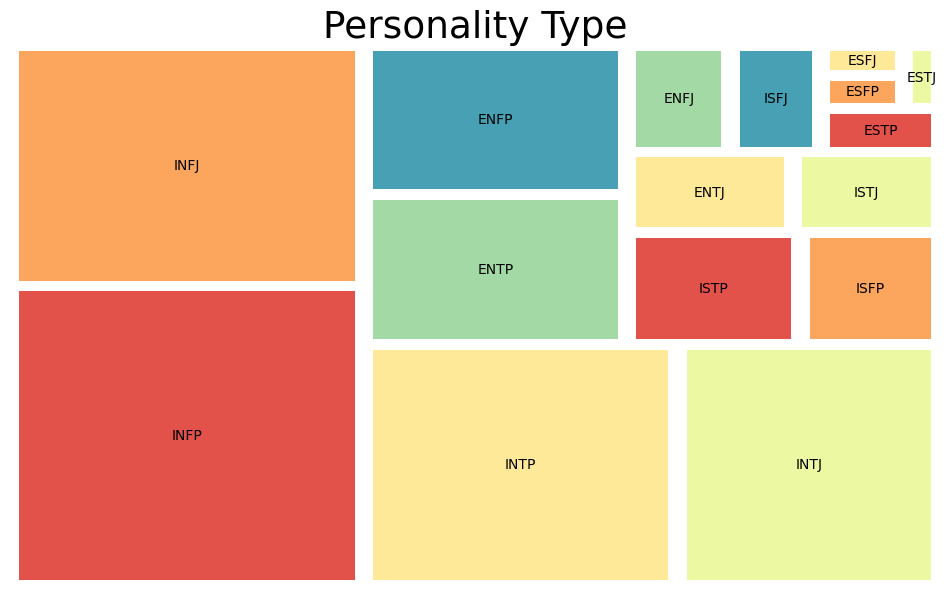

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Assuming df is your DataFrame

# Calculate the count of each personality type
personality_counts = df['type'].value_counts()

# Create a figure
plt.figure(figsize=(12, 7))

# Create a treemap using squarify.plot()
squarify.plot(
    sizes=personality_counts.values,
    color=sns.color_palette("Spectral"),
    pad=2,
    label=personality_counts.index,
)

# Set the title and axis off
plt.title('Personality Type', fontsize=27)
plt.axis('off')

# Display the plot
plt.show()


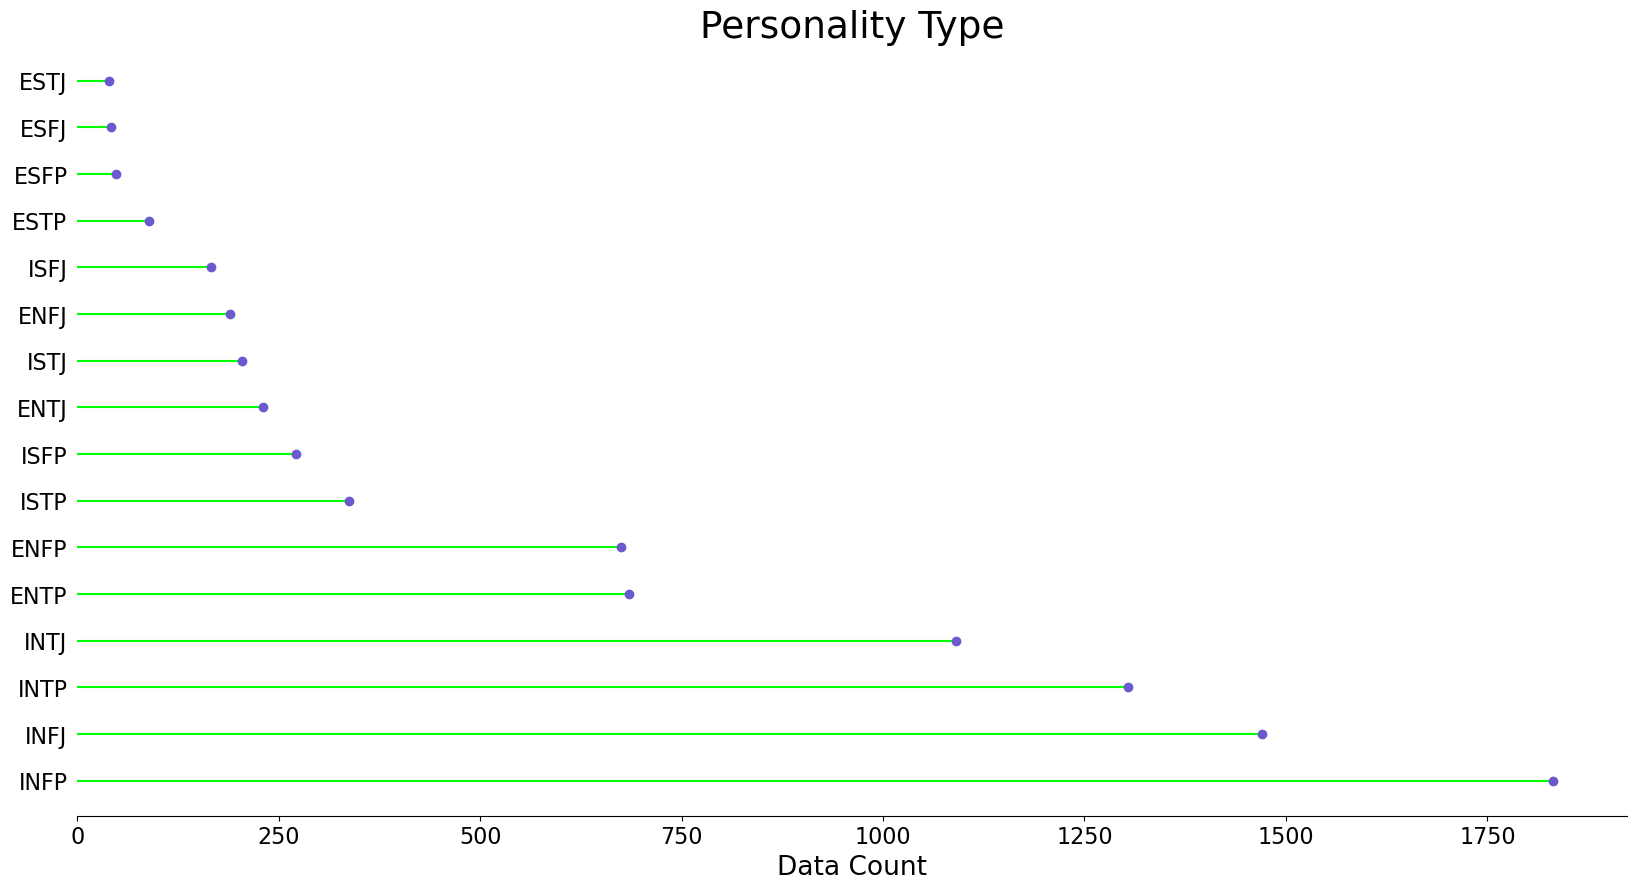

In [24]:
plt.figure(figsize=(20,10))
plt.hlines(y=count.keys(), xmin=0, xmax=count.values(), color='lime')
plt.plot(count.values(),count.keys(), 'o', color='slateblue')
plt.title('Personality Type', fontsize=27)
plt.xlabel('Data Count', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, None)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

In [25]:
df = df.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))


<Figure size 1500x1000 with 0 Axes>

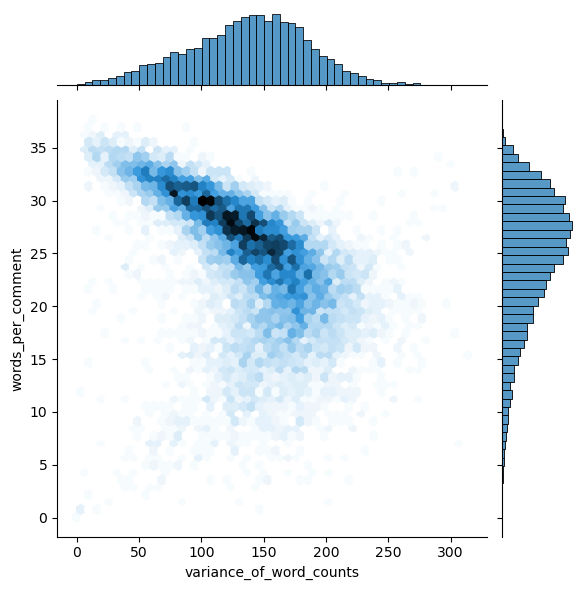

In [28]:
plt.figure(figsize=(15,10))
sns.jointplot(x=df["variance_of_word_counts"],y=df["words_per_comment"],kind="hex")

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_9764\315858616.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

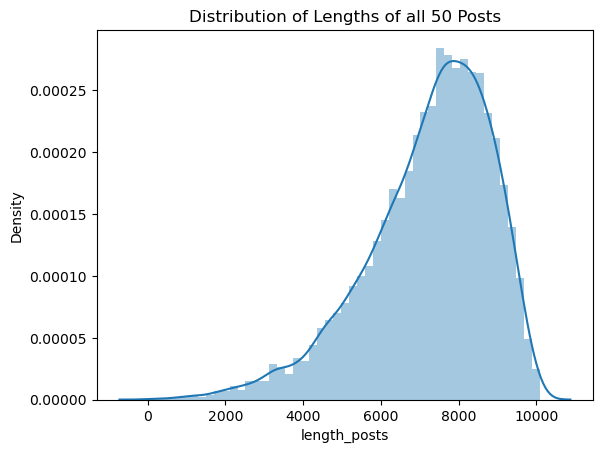

In [29]:
df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_6732\1322277589.py:8: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



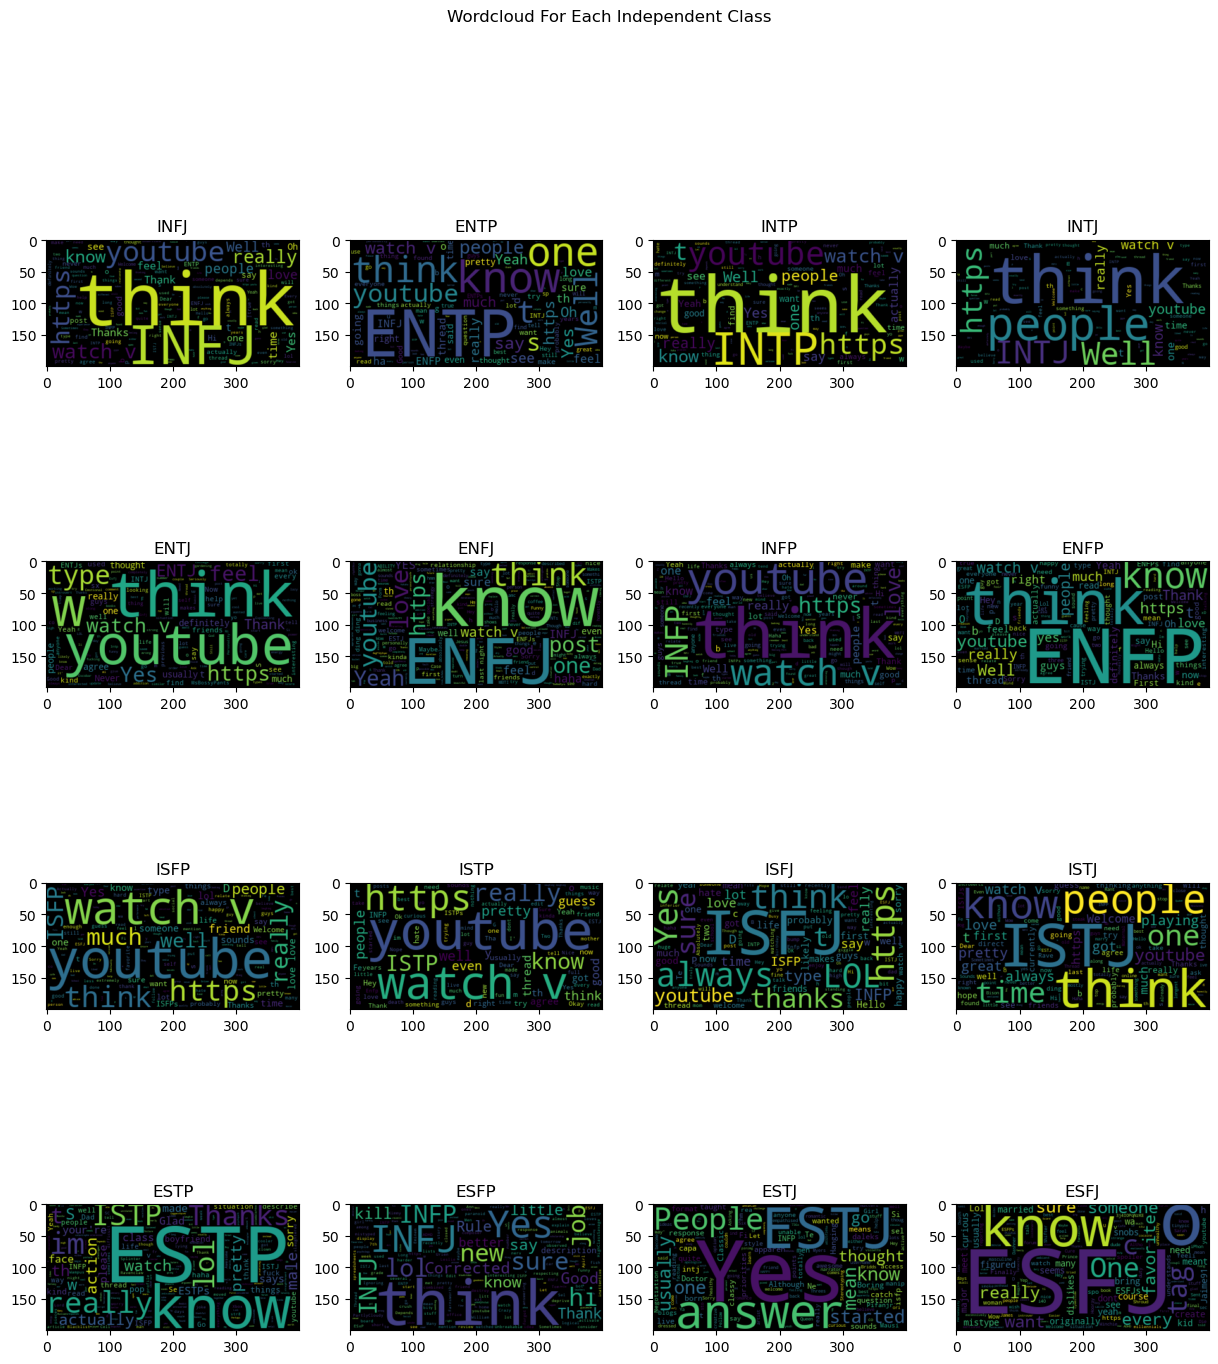

In [29]:
from wordcloud import WordCloud
fig, ax = plt.subplots(len(df['type'].unique()), figsize=(15,len(df['type'].unique())))
plt.suptitle("Wordcloud For Each Independent Class")
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    
    ax[k].axis("off")
    k+=1

In [30]:
from nltk.corpus import wordnet
wordnet.synsets("hello")


[Synset('hello.n.01')]

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
df_clean = df.copy()
def clear_text(df):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    stop_words = set(stopwords.words('english')) # Load stop words
    pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
    pers_types = [p.lower() for p in pers_types]
    
    print("Cleaning The Dataset")
    for sentence in tqdm(df.posts):
        
        sentence=sentence.lower()
        
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
        
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        
        sentence = " ".join([word for word in sentence.split() if word not in stop_words]) # Remove stop words
        #print(len(sentence))
        
        for p in pers_types:
            sentence = re.sub(p, '', sentence)
        #print(len(sentence))
        
        sentence = lemmatizer.lemmatize(sentence) # Lemmatize words
        
        data_length.append(len(sentence.split())) #Split data, measure length of new filtered data
        
        cleaned_text.append(sentence)
        
    return cleaned_text,data_length

df_clean.posts,df_clean_length=clear_text(df)
df_clean


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaning The Dataset


100%|██████████| 8675/8675 [00:04<00:00, 2144.41it/s]


type                                              posts  \
0     INFJ   moments sportscenter top ten plays pranks lif...   
1     ENTP  finding lack posts alarming sex boring positio...   
2     INTP  good one course say know blessing curse absolu...   
3     INTJ  dear  enjoyed conversation day esoteric gabbin...   
4     ENTJ  fired another silly misconception approaching ...   
...    ...                                                ...   
8670  ISFP  always think cats fi doms reason websites beco...   
8671  ENFP  thread already exists someplace else heck dele...   
8672  INTP  many questions things would take purple pill p...   
8673  INFP  conflicted right comes wanting children honest...   
8674  INFP  long since personalitycafe although seem chang...   

      words_per_comment  variance_of_word_counts  
0                 11.12                 135.2900  
1                 23.40                 187.4756  
2                 16.72                 180.6900  
3                 21.28                 181.8324  
4                 19.34                 196.4576  
...                 ...                      ...  
8670              15.92                 125.3300  
8671              26.18                 125.6144  
8672              18.96                 169.7764  
8673              34.10                  57.0336  
8674              27.22                 155.9200  

[8675 rows x 4 columns]

In [37]:
df_clean.posts

0        moments sportscenter top ten plays pranks lif...
1       finding lack posts alarming sex boring positio...
2       good one course say know blessing curse absolu...
3       dear  enjoyed conversation day esoteric gabbin...
4       fired another silly misconception approaching ...
                              ...                        
8670    always think cats fi doms reason websites beco...
8671    thread already exists someplace else heck dele...
8672    many questions things would take purple pill p...
8673    conflicted right comes wanting children honest...
8674    long since personalitycafe although seem chang...
Name: posts, Length: 8675, dtype: object

In [38]:
len(df_clean.posts)

8675

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_14320\790804810.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



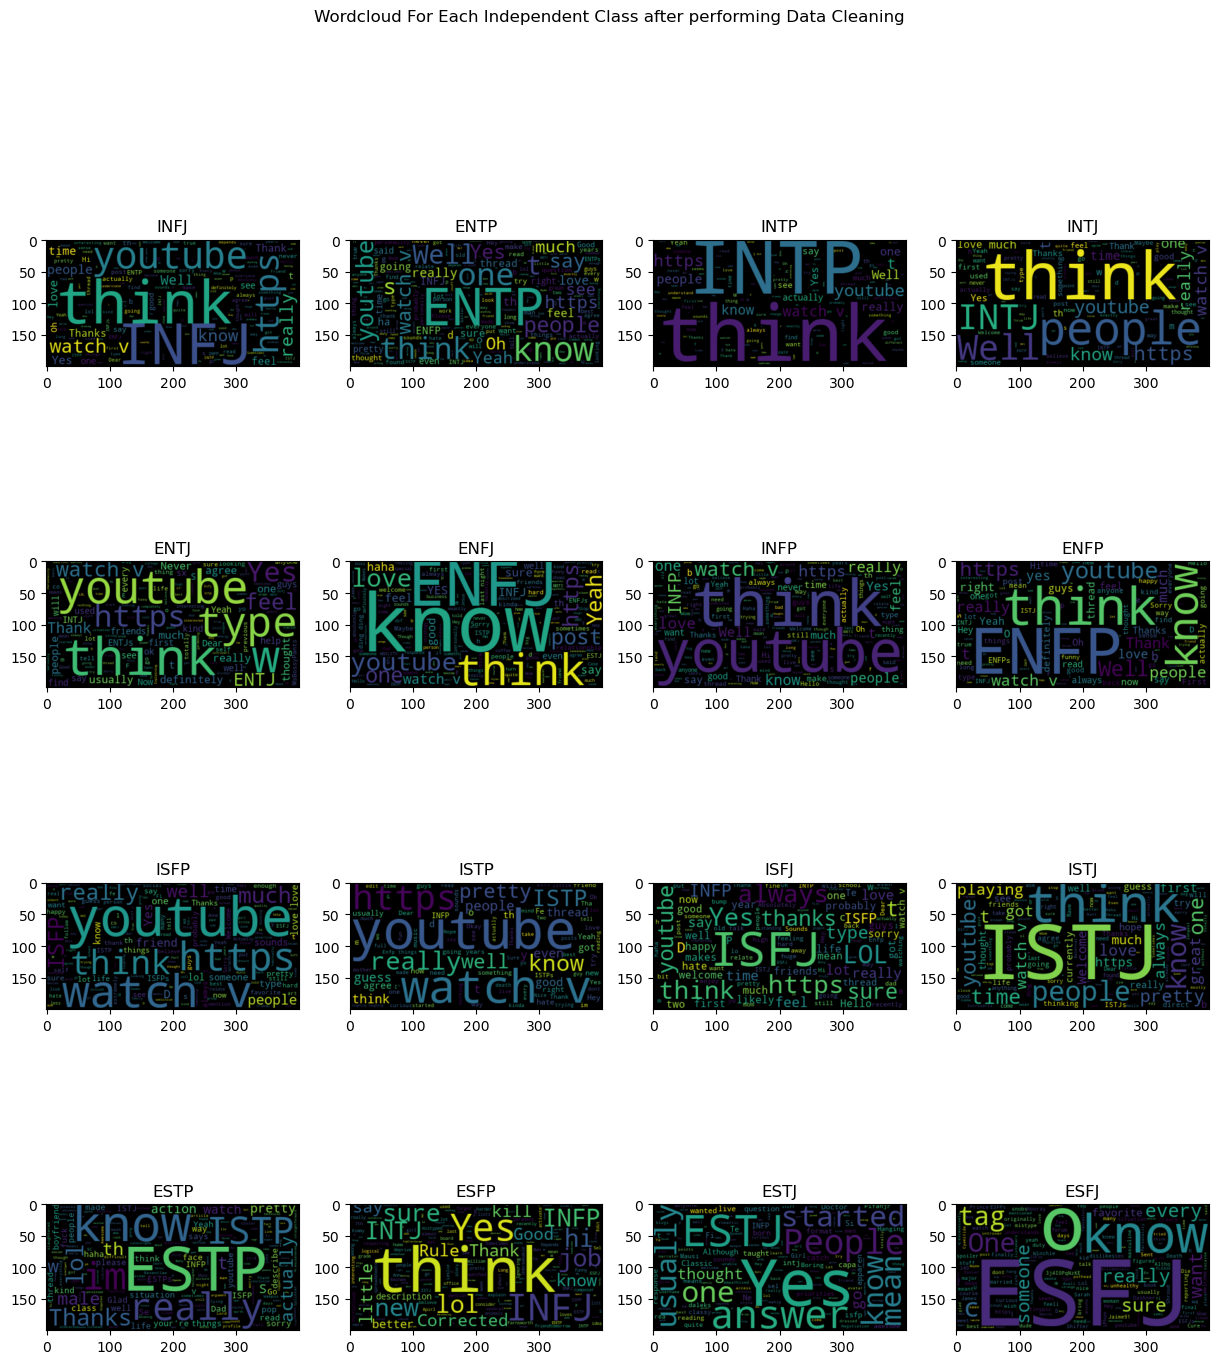

In [48]:
fig, ax = plt.subplots(len(df_clean['type'].unique()), figsize=(15,len(df_clean['type'].unique())))
plt.suptitle("Wordcloud For Each Independent Class after performing Data Cleaning")
k = 0
for i in df_clean['type'].unique():
    df_4 = df_clean[df_clean['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [39]:
from collections import Counter
words = list(df_clean["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('like', 69675),
 ('think', 49837),
 ('people', 47855),
 ('one', 37167),
 ('know', 36937),
 ('really', 35291),
 ('would', 35015),
 ('get', 30804),
 ('time', 27610),
 ('feel', 23337),
 ('much', 23120),
 ('well', 22926),
 ('s', 22118),
 ('love', 21094),
 ('good', 20720),
 ('things', 20487),
 ('say', 20267),
 ('way', 19653),
 ('something', 19538),
 ('want', 19378),
 ('see', 19136),
 ('also', 18330),
 ('type', 17149),
 ('even', 16914),
 ('always', 16809),
 ('lot', 16440),
 ('someone', 16135),
 ('make', 15869),
 ('life', 15394),
 ('could', 15288),
 ('never', 15250),
 ('go', 15116),
 ('though', 14682),
 ('thing', 14154),
 ('find', 14147),
 ('actually', 13213),
 ('person', 12808),
 ('right', 12711),
 ('going', 12710),
 ('first', 12649),
 ('sure', 12631),
 ('pretty', 12341),
 ('yes', 12277),
 ('friends', 12164),
 ('need', 11565),
 ('still', 10998),
 ('work', 10955),
 ('thought', 10633),
 ('said', 10558),
 ('many', 10383)]

In [74]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
target_encoder = LabelEncoder()

# Fit the LabelEncoder on the 'type' column
target_encoder.fit(df['type'])

# Transform the 'type' column into encoded numeric values
encoded_types = target_encoder.fit_transform(df['type'])

# Print the encoded values
print(encoded_types)


[ 8  3 11 ... 11  9  9]


In [71]:
le_name_mapping = dict(zip(target_encoder.classes_, target_encoder.fit_transform(target_encoder.classes_)))
new_dict = dict([(value, key) for key, value in le_name_mapping.items()])
new_dict

{0: 'ENFJ',
 1: 'ENFP',
 2: 'ENTJ',
 3: 'ENTP',
 4: 'ESFJ',
 5: 'ESFP',
 6: 'ESTJ',
 7: 'ESTP',
 8: 'INFJ',
 9: 'INFP',
 10: 'INTJ',
 11: 'INTP',
 12: 'ISFJ',
 13: 'ISFP',
 14: 'ISTJ',
 15: 'ISTP'}

In [54]:
# saving the models
'''import pickle

with open('dic_name.pkl', 'wb') as file:
    pickle.dump(new_dict, file)'''

"import pickle\n\nwith open('dic_name.pkl', 'wb') as file:\n    pickle.dump(new_dict, file)"

In [44]:
target_names_orig = 16

In [85]:
X_train2, X_test2, y_train2, y_test2 = split(df_clean, 0.2)

Cleaning The Dataset


100%|██████████| 8675/8675 [00:02<00:00, 3817.56it/s]
C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



Splitting into train & test
Applying Tfidf Vectorization
Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [86]:
X_train2

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.0586486,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [87]:
X_test2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04214726, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06612044, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [88]:
y_train2

array([15,  8,  9, ...,  1,  9,  8])

In [89]:
y_test2

array([11,  3, 11, ...,  1,  9,  8])

In [91]:
model_accuracy_orig2, report_orig2, f1_orig2 = model(X_train2, X_test2, y_train2, y_test2, target_names_orig)
model_accuracy_orig2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Running Random Forest


In [94]:
f1_orig2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [95]:
X_train3, X_test3, y_train3, y_test3 = split(df_clean, 0.3)

Cleaning The Dataset


100%|██████████| 8675/8675 [00:02<00:00, 4106.55it/s]
C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



Splitting into train & test
Applying Tfidf Vectorization
Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [96]:
model_accuracy_orig3, report_orig3, f1_orig3 = model(X_train3, X_test3, y_train3, y_test3, target_names_orig)

model_accuracy_orig3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier
Running Random Forest


In [97]:
f1_orig3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

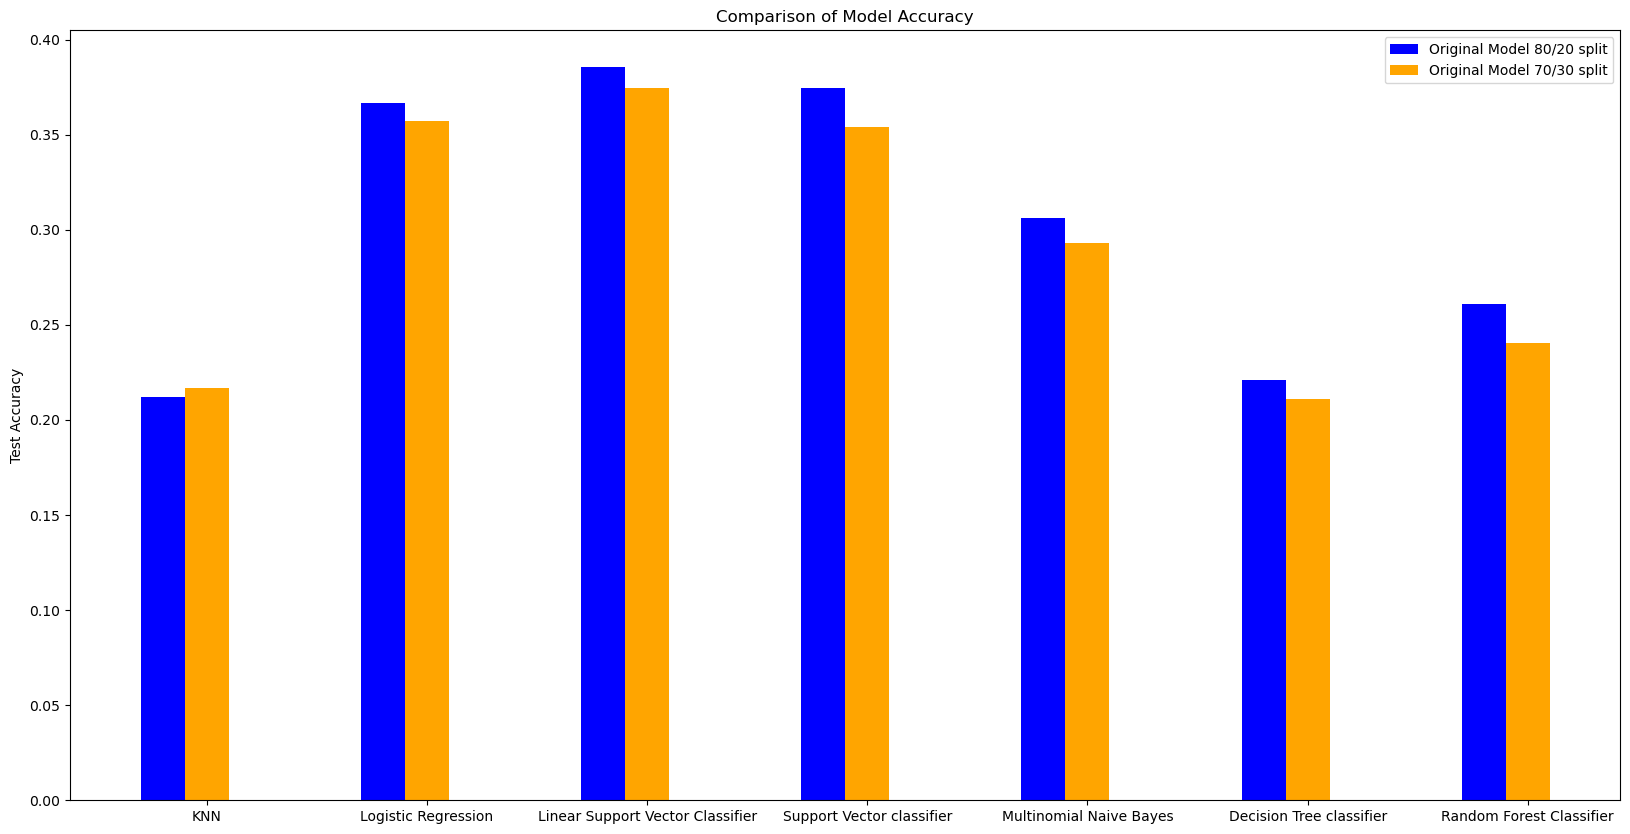

In [98]:
fig, ax = plt.subplots(figsize=(20, 10))
# Set width of each bar
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_orig2['Test accuracy'], color='blue', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_orig3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(model_accuracy_orig2['Models']))], model_accuracy_orig2['Models'])

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy')

# Add legend
plt.legend()

# Show plot
plt.show()

In [99]:
train_data2 = pd.DataFrame({'posts': list(X_train2), 'type': list(y_train2)}, index=None)
train_data2

posts  type
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     8
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    10
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
...                                                 ...   ...
6935  [0.0, 0.03978110605893184, 0.0, 0.0, 0.0, 0.0,...    11
6936  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    10
6937  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
6938  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
6939  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     8

[6940 rows x 2 columns]

In [100]:
train_data3 = pd.DataFrame({'posts': list(X_train3), 'type': list(y_train3)}, index=None)
train_data3

posts  type
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     8
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     7
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
4     [0.05392913172173782, 0.0, 0.0, 0.0, 0.0, 0.0,...    10
...                                                 ...   ...
6067  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
6068  [0.0, 0.0, 0.0, 0.05118042305110309, 0.0, 0.0,...    11
6069  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
6070  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    10
6071  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     8

[6072 rows x 2 columns]

In [101]:
print("For 80/20 split:")
train_data2.type.value_counts()

For 80/20 split:


9     1466
8     1176
11    1043
10     873
3      548
1      540
15     270
13     217
2      185
14     164
0      152
12     133
7       71
5       38
4       33
6       31
Name: type, dtype: int64

In [102]:
print("For 70/30 Split: ")
train_data3.type.value_counts()

For 70/30 Split: 


9     1282
8     1029
11     913
10     764
3      479
1      472
15     236
13     190
2      162
14     144
0      133
12     116
7       62
5       34
4       29
6       27
Name: type, dtype: int64

In [103]:
train_data_under2= sampling('under', train_data2, 'type', [9,8,11,10,], 600)
train_data_under2

posts  type
5331  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
4963  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
4288  [0.0, 0.0, 0.07597088423917486, 0.0, 0.0, 0.0,...     9
6173  [0.0, 0.0399157466288543, 0.0, 0.0, 0.0, 0.0, ...     9
4312  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
...                                                 ...   ...
6926  [0.0, 0.0, 0.0, 0.0, 0.0, 0.057737741953966804...    15
6927  [0.0, 0.036736062409850403, 0.0, 0.0, 0.0, 0.0...     3
6930  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
6931  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
6937  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1

[4782 rows x 2 columns]

In [104]:
np.vstack(np.array(train_data_under2.posts))

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07597088, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [105]:
X_test2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04214726, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06612044, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [106]:
train_data_under2.type.value_counts()

9     600
8     600
11    600
10    600
3     548
1     540
15    270
13    217
2     185
14    164
0     152
12    133
7      71
5      38
4      33
6      31
Name: type, dtype: int64

In [107]:
X_train_under2, y_train_under2 = get_train(train_data_under2)

In [108]:
X_train_under2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07597088, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [109]:
y_train_under2

array([9, 9, 9, ..., 1, 3, 1])

In [110]:
print(X_train_under2.shape, X_test2.shape)

(4782, 5000) (1735, 5000)


In [111]:
print(y_train_under2.shape, y_test2.shape)

(4782,) (1735,)


In [112]:
model_accuracy_under2, report_under2, f1_orig_under2 = model(X_train_under2, X_test2, y_train_under2, y_test2, target_names_orig)

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier
Running Random Forest


In [113]:
model_accuracy_under2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [114]:
train_data3.type.value_counts()

9     1282
8     1029
11     913
10     764
3      479
1      472
15     236
13     190
2      162
14     144
0      133
12     116
7       62
5       34
4       29
6       27
Name: type, dtype: int64

In [115]:
train_data_under3 = sampling('under', train_data3, 'type', [9,8,11,10,], 500)
train_data_under3

posts  type
705   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
4382  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
4798  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
2437  [0.0, 0.03502947323308622, 0.0, 0.0, 0.0, 0.0,...     9
4933  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     9
...                                                 ...   ...
6060  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
6062  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14
6063  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
6064  [0.0, 0.020335363110752184, 0.0, 0.0, 0.277836...     3
6069  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1

[4084 rows x 2 columns]

In [116]:
train_data_under3.type.value_counts()

9     500
8     500
11    500
10    500
3     479
1     472
15    236
13    190
2     162
14    144
0     133
12    116
7      62
5      34
4      29
6      27
Name: type, dtype: int64

In [119]:
X_train_under3, y_train_under3 = get_train(train_data_under3)

In [120]:
X_train_under3, y_train_under3

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.02033536, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([9, 9, 9, ..., 1, 3, 1]))

In [121]:
print(X_train_under3.shape, X_test3.shape)

(4084, 5000) (2603, 5000)


In [122]:
model_accuracy_under3, report_under3, f1_orig_under3 = model(X_train_under3, X_test3, y_train_under3, y_test3, target_names_orig)

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier
Running Random Forest


In [123]:
model_accuracy_under3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [124]:
f1_orig_under3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

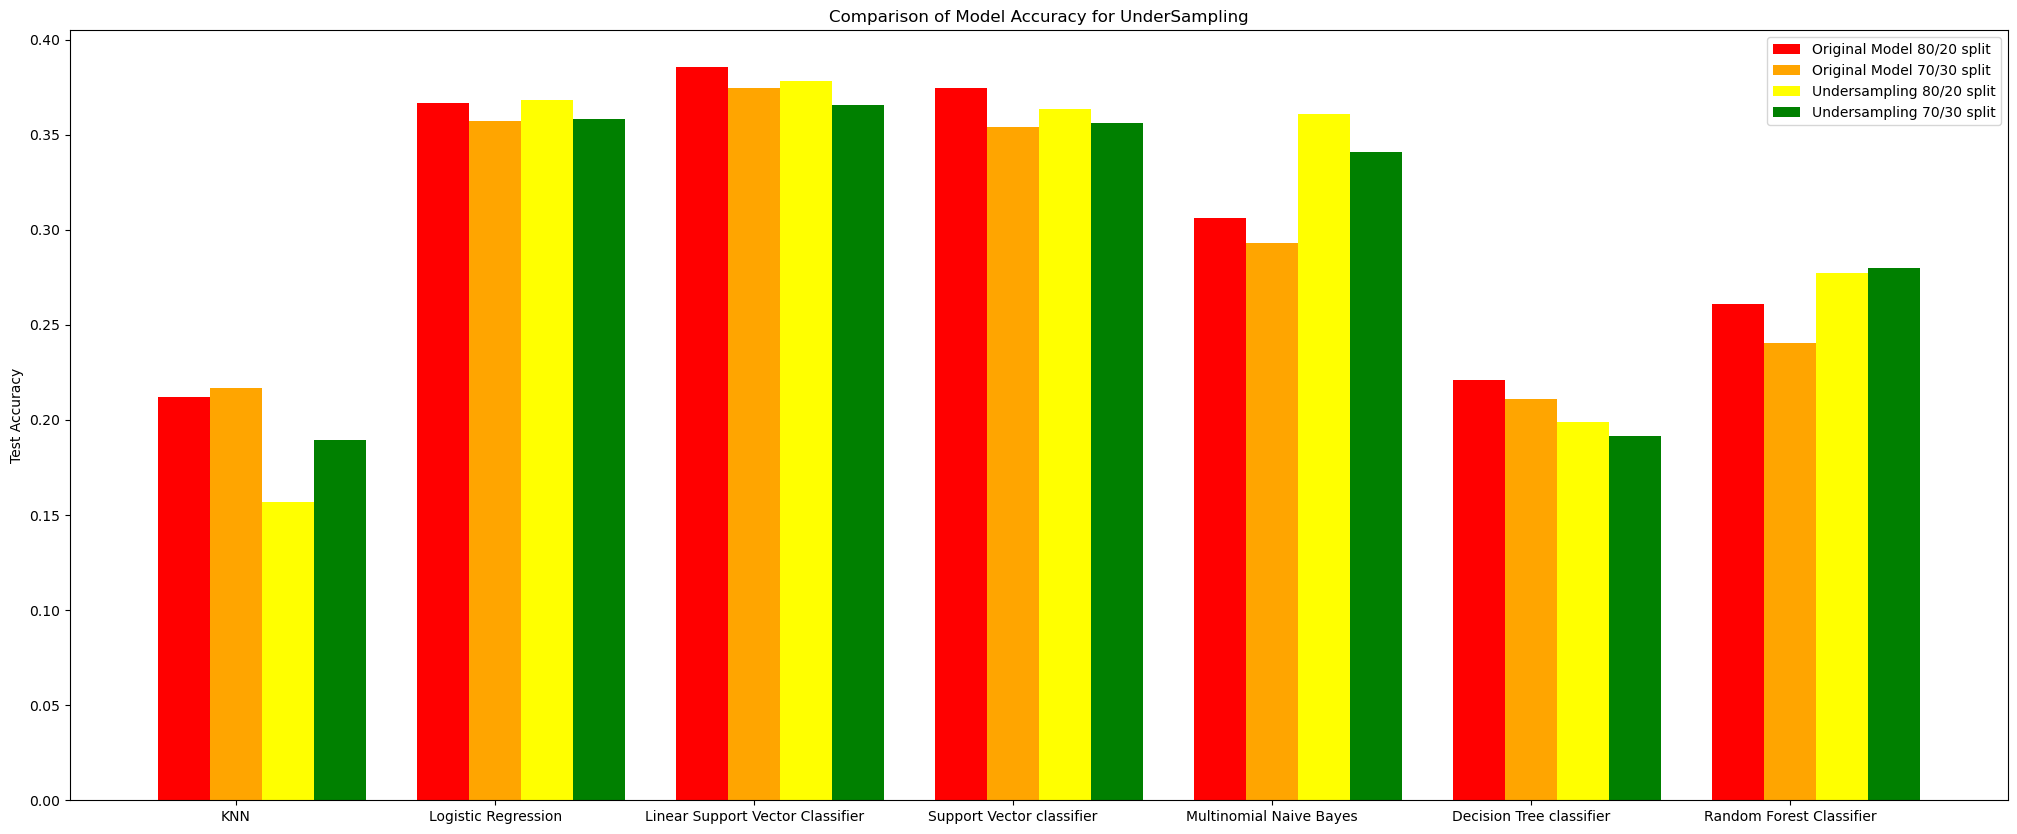

In [125]:
fig, ax = plt.subplots(figsize=(25, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_orig2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_orig3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, model_accuracy_under2['Test accuracy'], color='yellow', width=bar_width, label='Undersampling 80/20 split')
plt.bar(r4, model_accuracy_under3['Test accuracy'], color='green', width=bar_width, label='Undersampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy for UnderSampling')

# Add legend
plt.legend()
plt.show()

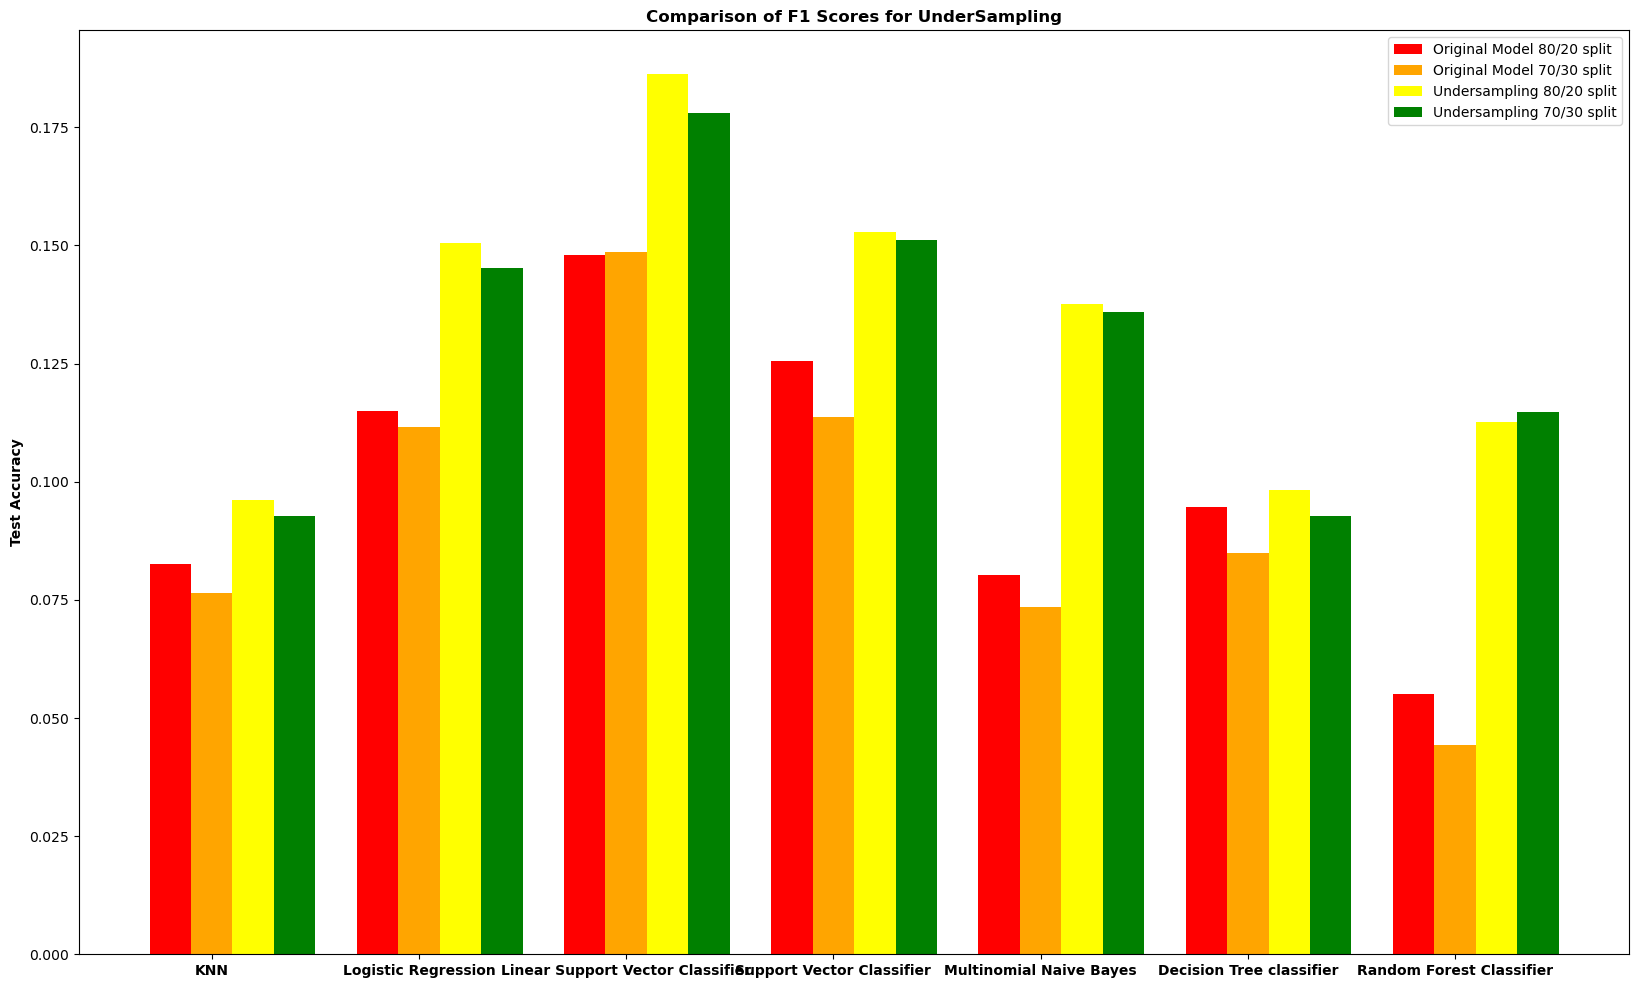

In [126]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2
models = f1_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(f1_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig2['Test F1 Score'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, f1_orig3['Test F1 Score'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, f1_orig_under2['Test F1 Score'], color='yellow', width=bar_width, label='Undersampling 80/20 split')
plt.bar(r4, f1_orig_under3['Test F1 Score'], color='green', width=bar_width, label='Undersampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('Comparison of F1 Scores for UnderSampling',fontweight='bold')

# Add legend
plt.legend()
plt.show()

In [127]:
train_data2.type.value_counts()

9     1466
8     1176
11    1043
10     873
3      548
1      540
15     270
13     217
2      185
14     164
0      152
12     133
7       71
5       38
4       33
6       31
Name: type, dtype: int64

In [128]:
train_data2.type.value_counts().max()

1466

In [129]:
train_data_over2 = sampling('over', train_data2, 'type', list(train_data2.type.unique()), train_data2.type.value_counts().max())
train_data_over2

posts  type
50    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15
5189  [0.0, 0.033260287139778265, 0.0, 0.0, 0.0, 0.0...    15
6912  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15
5085  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0853490944778...    15
4052  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15
...                                                 ...   ...
1276  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0687907768654...     0
936   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     0
2867  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     0
363   [0.0, 0.0, 0.0, 0.0, 0.05855606878300993, 0.0,...     0
2650  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     0

[23456 rows x 2 columns]

In [130]:
print("Random Oversampling")
train_data_over2.type.value_counts()

Random Oversampling


15    1466
8     1466
9     1466
10    1466
3     1466
11    1466
1     1466
13    1466
7     1466
14    1466
2     1466
12    1466
4     1466
6     1466
5     1466
0     1466
Name: type, dtype: int64

In [131]:
X_train_over2, y_train_over2 = get_train(train_data_over2)

In [132]:
print(X_train_over2.shape, X_test2.shape)

(23456, 5000) (1735, 5000)


In [133]:
model_accuracy_over2, report_over2, f1_over2 = model(X_train_over2, X_test2, y_train_over2, y_test2, target_names_orig)

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier
Running Random Forest


In [134]:
model_accuracy_over2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [135]:
f1_over2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [136]:
train_data_over3 = sampling('over', train_data3, 'type', list(train_data3.type.unique()), train_data3.type.value_counts().max())
train_data_over3

posts  type
719   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
1394  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
1250  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
1974  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
2965  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     3
...                                                 ...   ...
3524  [0.062085383452901946, 0.03833527999294656, 0....     6
1976  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     6
3036  [0.0, 0.03515348443073605, 0.0, 0.0, 0.0, 0.0,...     6
4226  [0.0, 0.0, 0.0, 0.0, 0.058880306619377515, 0.0...     6
5012  [0.0, 0.03414374354634941, 0.0, 0.0, 0.0, 0.0,...     6

[20512 rows x 2 columns]

In [137]:
X_train_over3, y_train_over3 = get_train(train_data_over3)

In [138]:
print(X_train_over3.shape, X_test3.shape)
print(y_train_over3.shape, y_test3.shape)

(20512, 5000) (2603, 5000)
(20512,) (2603,)


In [139]:
model_accuracy_over3, report_over3, f1_over3 = model(X_train_over3, X_test3, y_train_over3, y_test3, target_names_orig)

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier
Running Random Forest


In [140]:
model_accuracy_over3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [141]:
f1_over3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

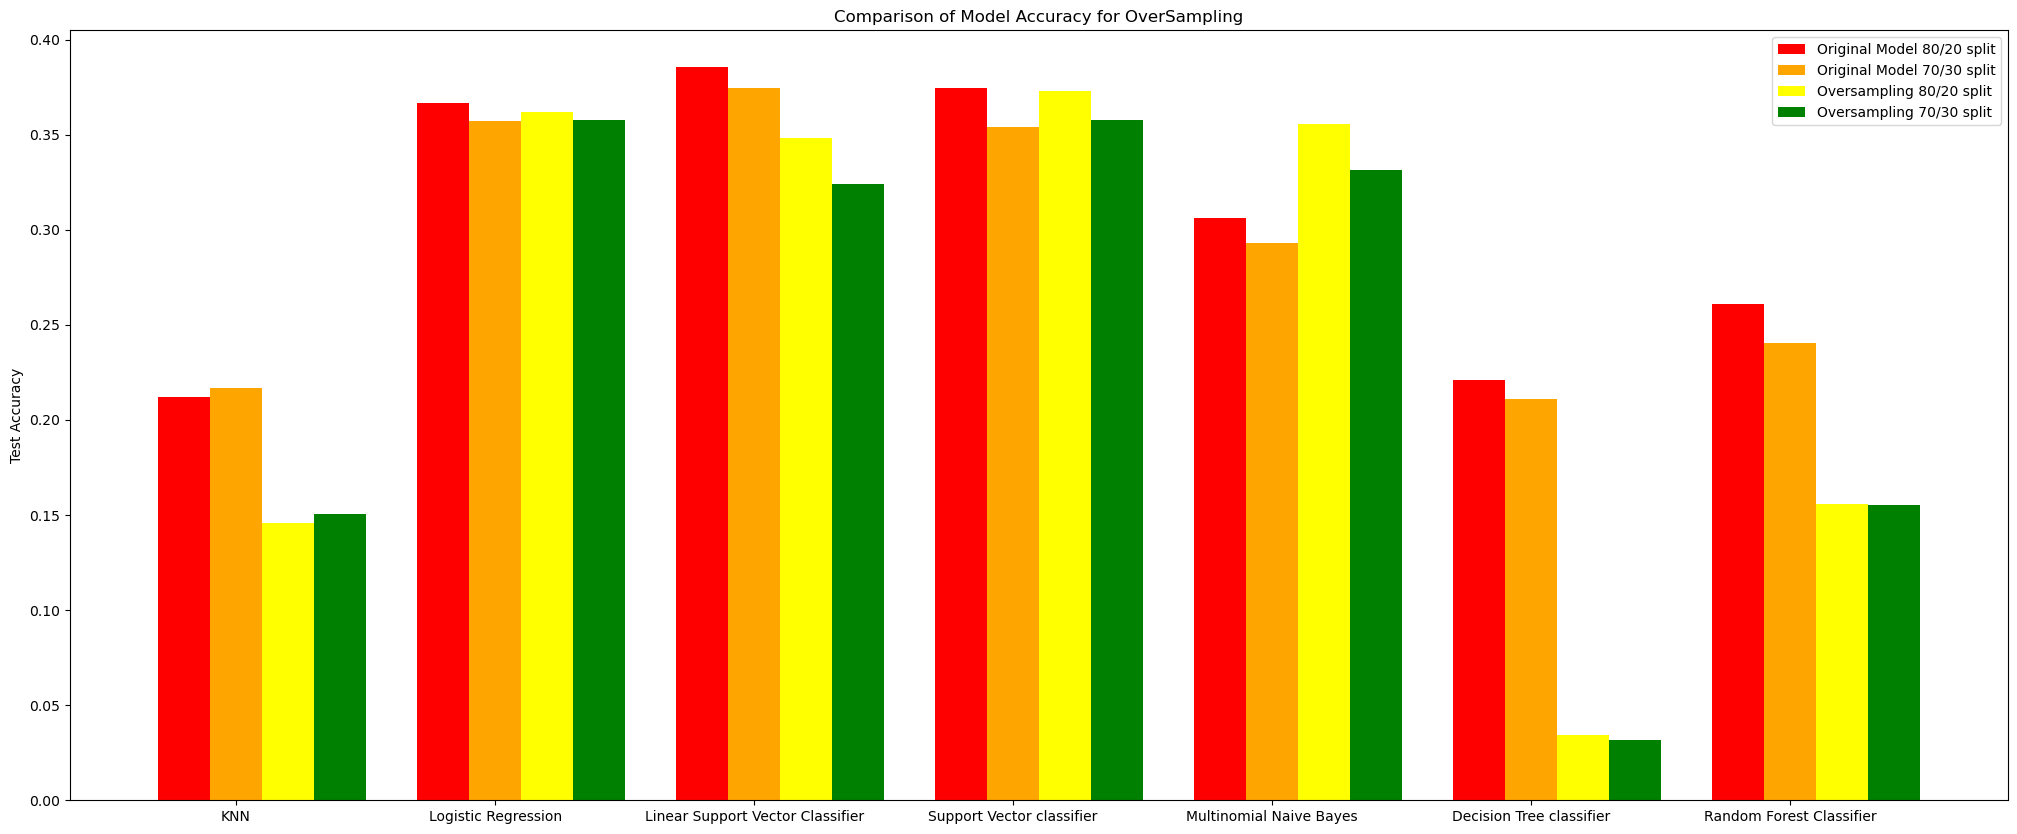

In [142]:
fig, ax = plt.subplots(figsize=(25, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_orig2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_orig3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, model_accuracy_over2['Test accuracy'], color='yellow', width=bar_width, label='Oversampling 80/20 split')
plt.bar(r4, model_accuracy_over3['Test accuracy'], color='green', width=bar_width, label='Oversampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy for OverSampling')

# Add legend
plt.legend()
plt.show()

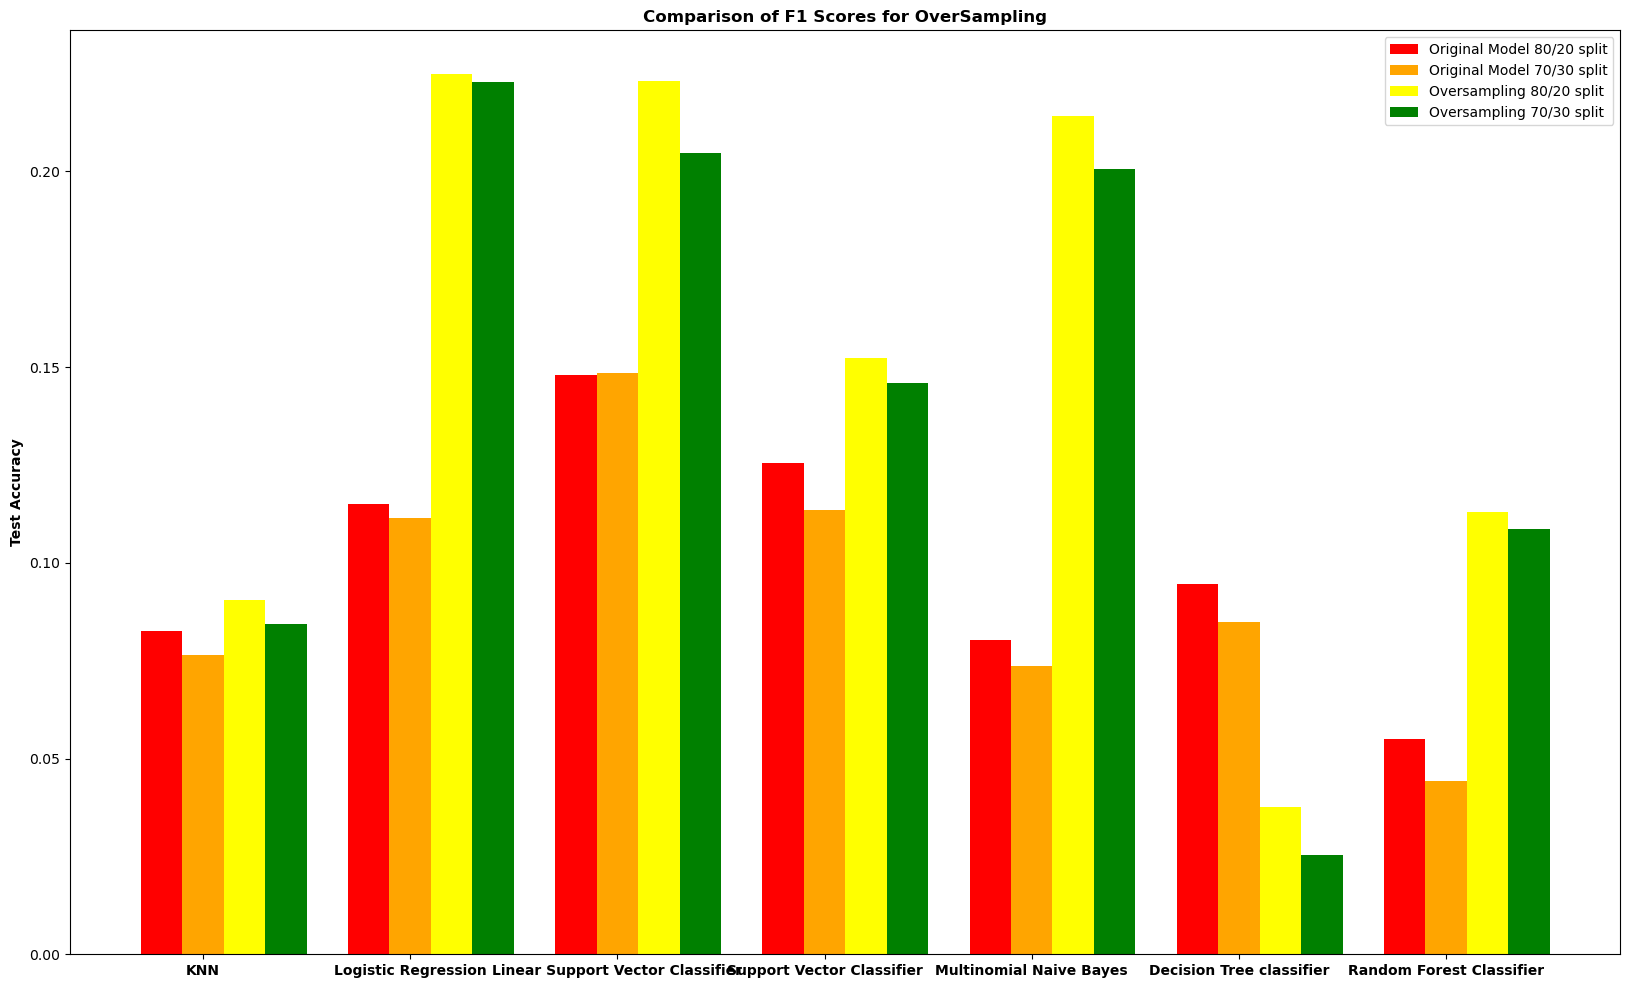

In [143]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2
models = f1_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(f1_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig2['Test F1 Score'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, f1_orig3['Test F1 Score'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, f1_over2['Test F1 Score'], color='yellow', width=bar_width, label='Oversampling 80/20 split')
plt.bar(r4, f1_over3['Test F1 Score'], color='green', width=bar_width, label='Oversampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('Comparison of F1 Scores for OverSampling',fontweight='bold')

# Add legend
plt.legend()
plt.show()

In [144]:
smote = SMOTE(sampling_strategy='minority')
smote

SMOTE(sampling_strategy='minority')

In [145]:
X_train2_temp = X_train2
y_train2_temp = y_train2
for i in range(15):
    X_train_sm2, y_train_sm2 = smote.fit_resample(X_train2_temp,y_train2_temp)   
    X_train2_temp = X_train_sm2
    y_train2_temp = y_train_sm2

In [146]:
X_train2.shape

(6940, 5000)

In [147]:
X_train_sm2.shape

(23456, 5000)

In [148]:
pd.DataFrame(y_train2)[0].value_counts()

9     1466
8     1176
11    1043
10     873
3      548
1      540
15     270
13     217
2      185
14     164
0      152
12     133
7       71
5       38
4       33
6       31
Name: 0, dtype: int64

In [149]:
pd.DataFrame(y_train_sm2)[0].value_counts()

15    1466
8     1466
9     1466
10    1466
3     1466
11    1466
1     1466
13    1466
7     1466
14    1466
2     1466
12    1466
4     1466
6     1466
5     1466
0     1466
Name: 0, dtype: int64

In [150]:
model_accuracy_smote2, report_smote2, f1_smote2 = model(X_train_sm2, X_test2, y_train_sm2, y_test2, target_names_orig)
model_accuracy_smote2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Running Random Forest


In [151]:
f1_smote2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [152]:
X_train3_temp = X_train3
y_train3_temp = y_train3
for i in range(15):
    X_train_sm3, y_train_sm3 = smote.fit_resample(X_train3_temp,y_train3_temp)   
    X_train3_temp = X_train_sm3
    y_train3_temp = y_train_sm3

In [153]:
X_train3.shape

(6072, 5000)

In [154]:
X_train_sm3.shape

(20512, 5000)

In [155]:
pd.DataFrame(y_train3)[0].value_counts()

9     1282
8     1029
11     913
10     764
3      479
1      472
15     236
13     190
2      162
14     144
0      133
12     116
7       62
5       34
4       29
6       27
Name: 0, dtype: int64

In [156]:
pd.DataFrame(y_train_sm3)[0].value_counts()

3     1282
8     1282
7     1282
10    1282
9     1282
11    1282
15    1282
0     1282
12    1282
1     1282
2     1282
14    1282
13    1282
5     1282
4     1282
6     1282
Name: 0, dtype: int64

In [157]:
model_accuracy_smote3, report_smote3, f1_smote3 = model(X_train_sm3, X_test3, y_train_sm3, y_test3, target_names_orig)
model_accuracy_smote3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Running KNN
Running Logistic Regression
Running Linear SVC
Running SVC
Running Multinomial Naive Bayes
Running Decision Tree Classifier


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Running Random Forest


In [158]:
f1_smote3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

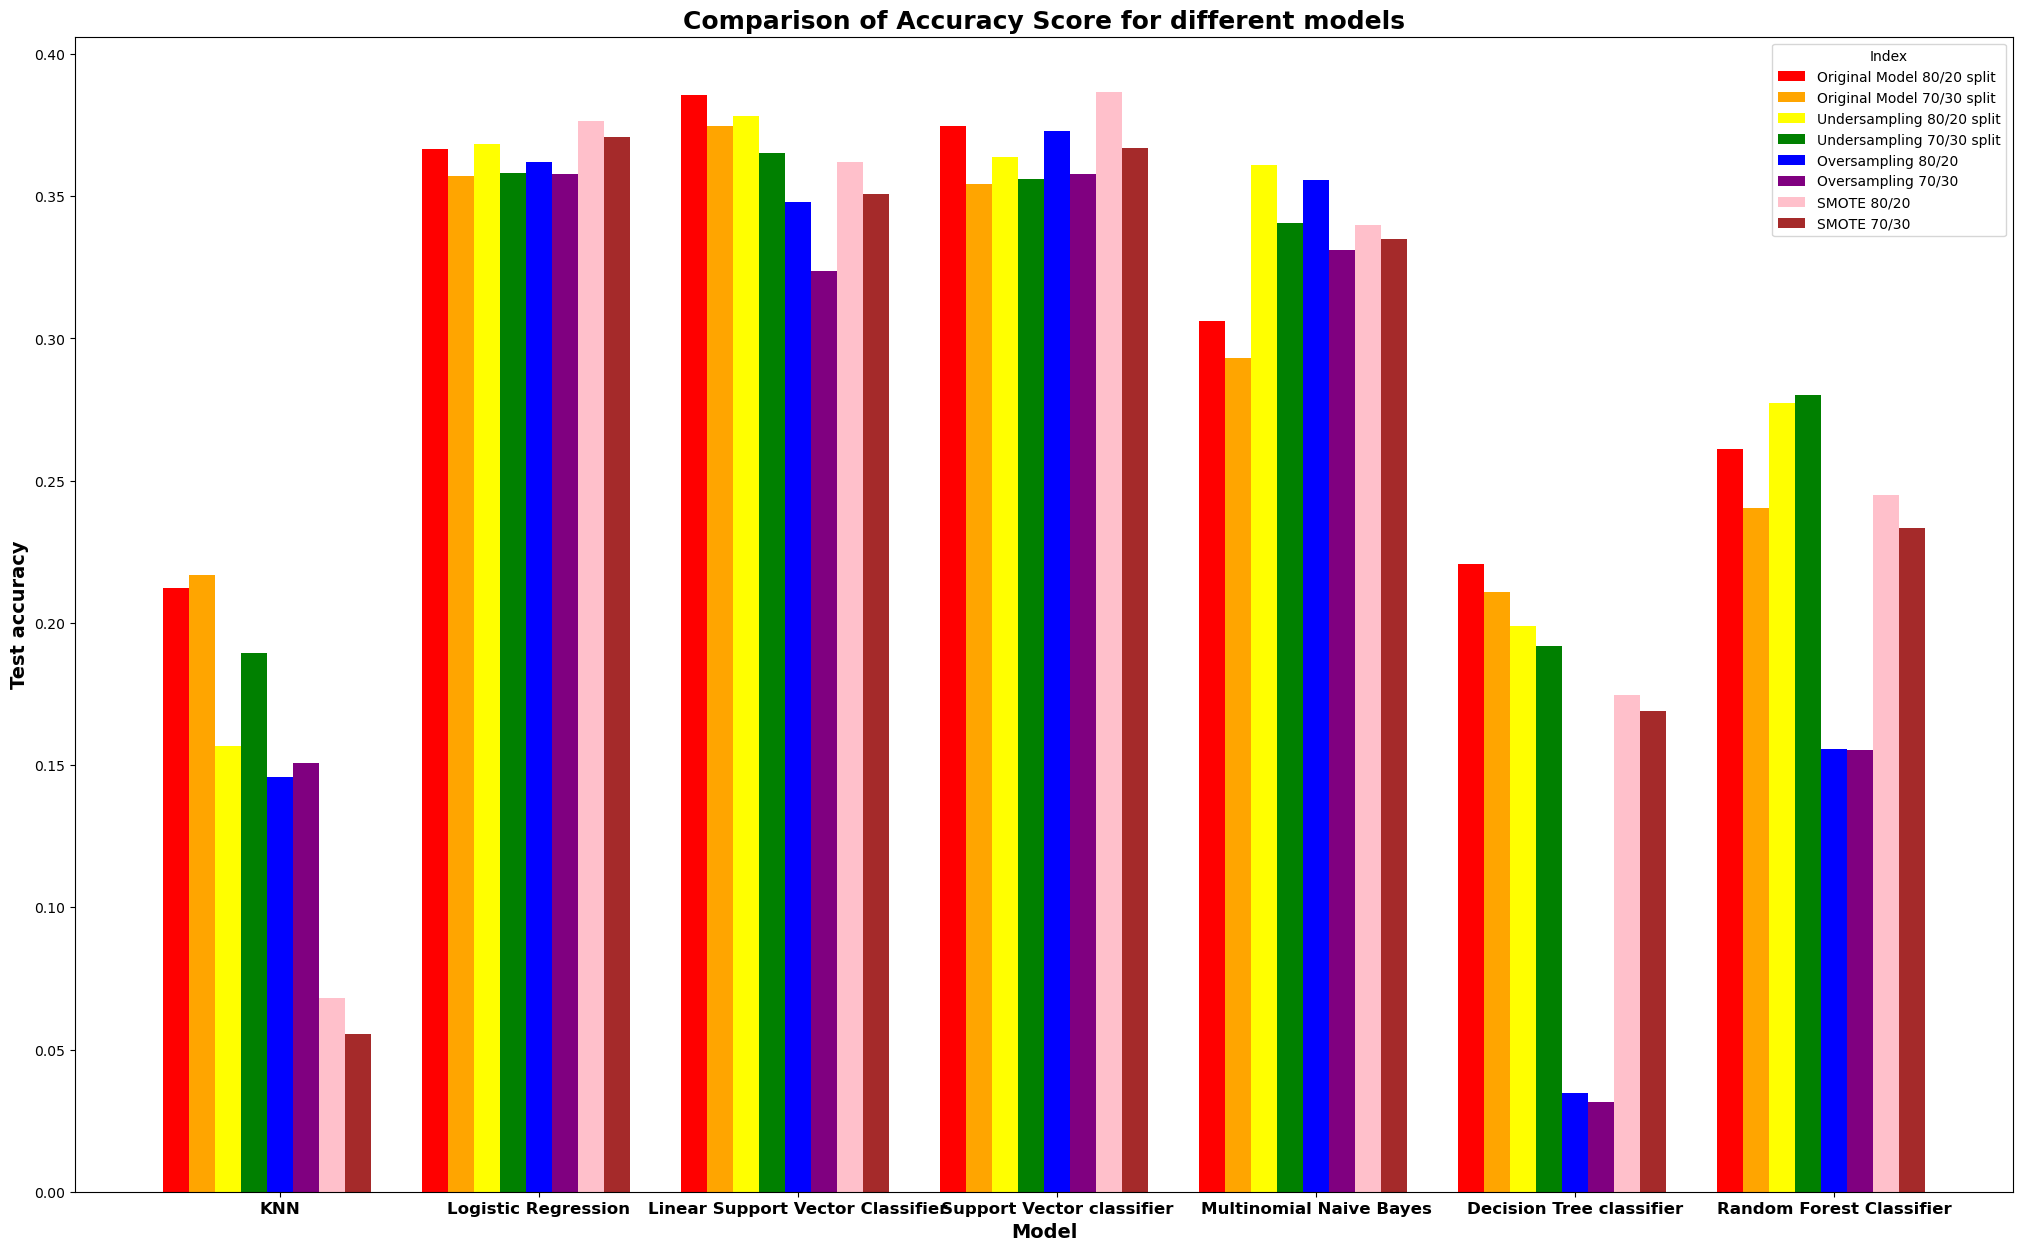

In [159]:
import matplotlib.pyplot as plt

# create a bar plot for test accuracy
fig, ax = plt.subplots(figsize=(25, 15))
width = 0.1
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown']
name = ['Original Model 80/20 split', 'Original Model 70/30 split', 'Undersampling 80/20 split', 'Undersampling 70/30 split','Oversampling 80/20', 'Oversampling 70/30',
        'SMOTE 80/20', 'SMOTE 70/30']
accuracies = [model_accuracy_orig2, model_accuracy_orig3, model_accuracy_under2, model_accuracy_under3, model_accuracy_over2, model_accuracy_over3, model_accuracy_smote2, model_accuracy_smote3]
for i in range(len(accuracies)):
    ax.bar(x=np.arange(len(accuracies[i]['Models']))+i*width, height=accuracies[i]['Test accuracy'], width=width, color=colors[i], label=f"{name[i]}")
ax.set_ylabel('Test accuracy', fontweight='bold', fontsize=14)
ax.set_xlabel('Model', fontweight='bold', fontsize=14)
ax.set_title('Comparison of Accuracy Score for different models', fontweight='bold', fontsize=18)
ax.set_xticks(np.arange(len(model_accuracy_orig2['Models']))+width*4)
ax.set_xticklabels(model_accuracy_orig2['Models'], fontweight='bold', fontsize=12)
ax.legend(title="Index")
plt.show()

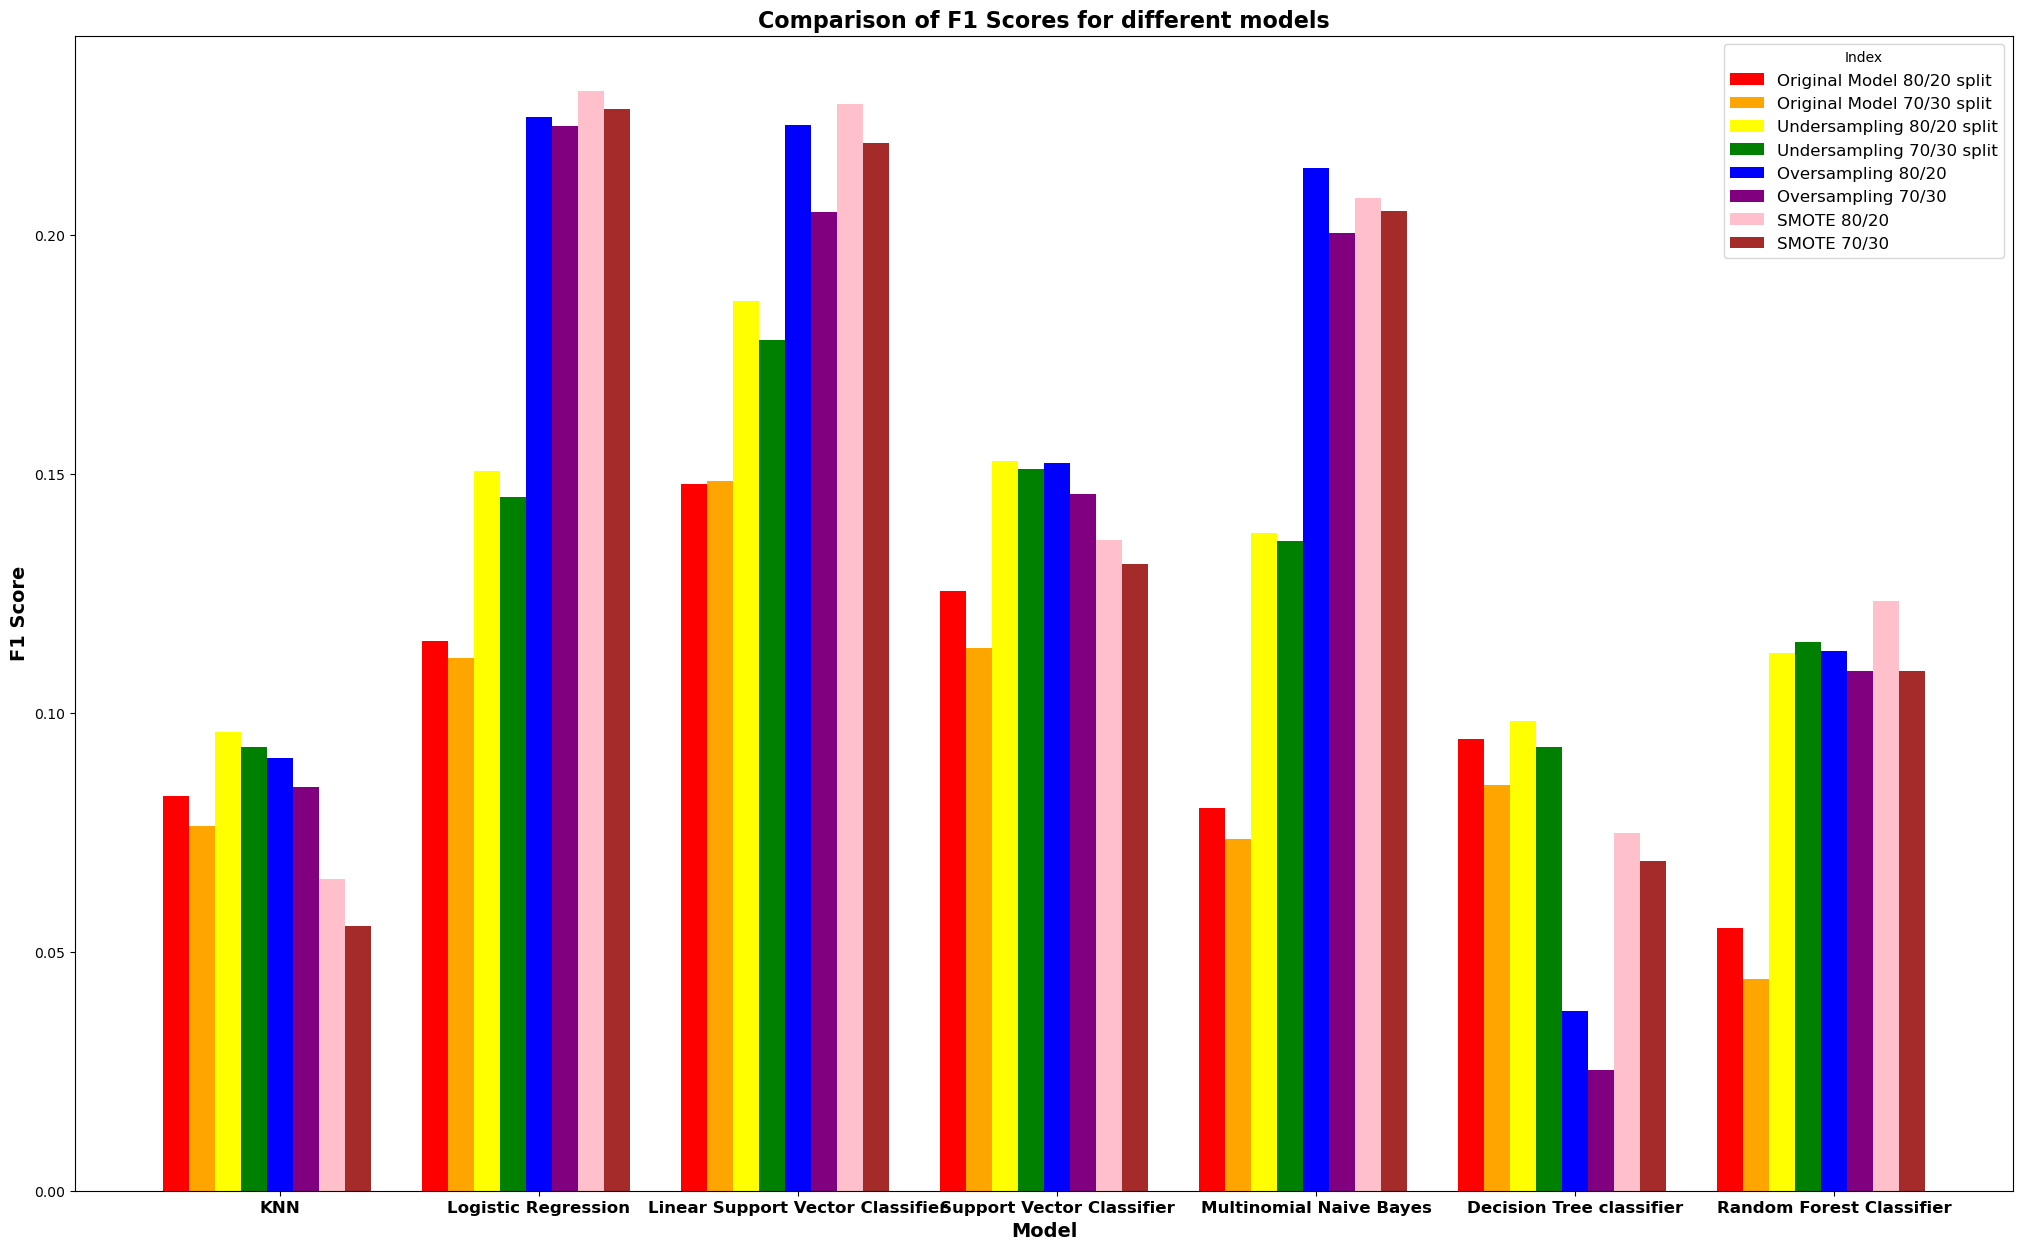

In [160]:
fig, ax = plt.subplots(figsize=(25, 15))
width = 0.1
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown']
name = ['Original Model 80/20 split', 'Original Model 70/30 split', 'Undersampling 80/20 split', 'Undersampling 70/30 split','Oversampling 80/20', 'Oversampling 70/30',
        'SMOTE 80/20', 'SMOTE 70/30']
accuracies = [f1_orig2, f1_orig3, f1_orig_under2, f1_orig_under3, f1_over2, f1_over3, f1_smote2, f1_smote3]
for i in range(len(accuracies)):
    ax.bar(x=np.arange(len(accuracies[i]['Models']))+i*width, height=accuracies[i]['Test F1 Score'], width=width, color=colors[i], label=f"{name[i]}")
ax.set_ylabel('F1 Score', fontweight='bold', fontsize=14)
ax.set_xlabel('Model', fontweight='bold', fontsize=14)
ax.set_title('Comparison of F1 Scores for different models', fontweight='bold', fontsize=16)
ax.set_xticks(np.arange(len(f1_orig2['Models']))+width*4)
ax.set_xticklabels(f1_orig2['Models'], fontweight='bold', fontsize=12)
ax.legend(title="Index", fontsize=12)
plt.show()

In [162]:
df2 = df.replace(['INTJ', 'INTP', 'ENTJ', 'ENTP' ], 'Analysts')

df2 = df2.replace(['INFJ', 'INFP', 'ENFJ', 'ENFP'], 'Diplomats')

df2 = df2.replace(['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ'], 'Sentinels')

df2 = df2.replace(['ISTP', 'ISFP', 'ESTP', 'ESFP'], 'Explorers')

In [163]:
df2.head()

type                                              posts  \
0  Diplomats  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1   Analysts  'I'm finding the lack of me in these posts ver...   
2   Analysts  'Good one  _____   https://www.youtube.com/wat...   
3   Analysts  'Dear INTP,   I enjoyed our conversation the o...   
4   Analysts  'You're fired.|||That's another silly misconce...   

   words_per_comment  variance_of_word_counts  
0              11.12                 135.2900  
1              23.40                 187.4756  
2              16.72                 180.6900  
3              21.28                 181.8324  
4              19.34                 196.4576

In [164]:
df2.type.value_counts()

Diplomats    4167
Analysts     3311
Explorers     745
Sentinels     452
Name: type, dtype: int64

Text(0.5, 1.0, 'Total post each personality type')

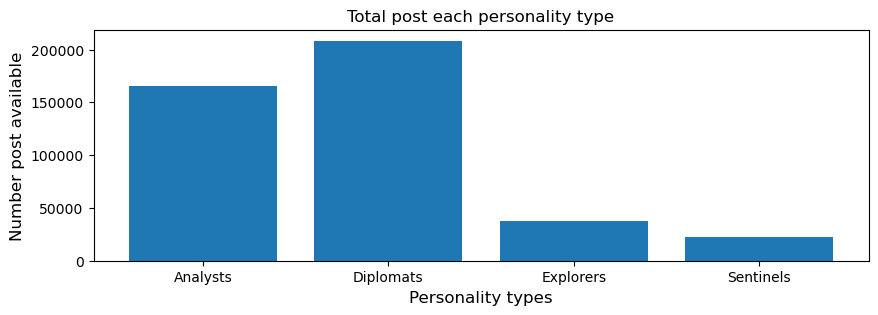

In [165]:
total_club = df2.groupby(['type']).count()*50
plt.figure(figsize = (10,3))
plt.bar(np.array(total_club.index), height =total_club['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_6732\2627744496.py:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



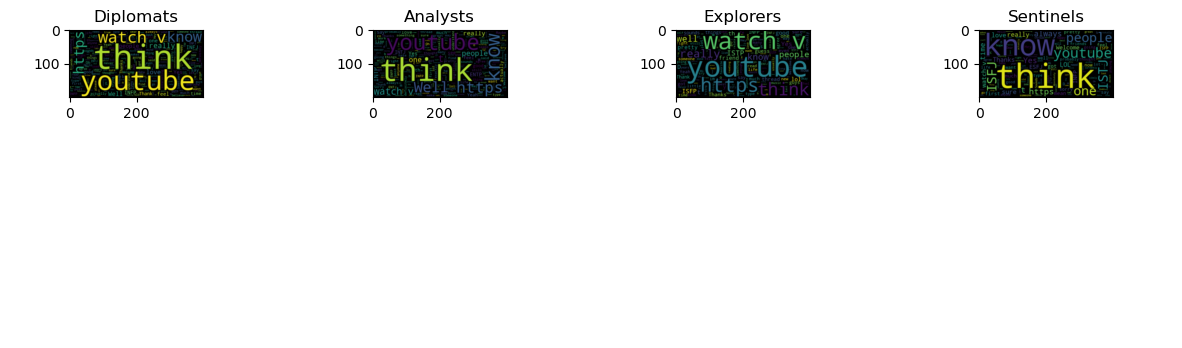

In [166]:
fig, ax = plt.subplots(len(df2['type'].unique()), figsize=(15,len(df2['type'].unique())))
k = 0
for i in df2['type'].unique():
    df_4 = df2[df2['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [ ]:
target_encoder=LabelEncoder()
target_encoder.fit(df2.type)

In [ ]:
target_encoder.classes_

In [ ]:
target_encoder

In [ ]:
df2.type.value_counts()

In [ ]:
np.unique(target_encoder.fit_transform(df2.type))

In [ ]:
le_name_mapping = dict(zip(target_encoder.classes_, target_encoder.fit_transform(target_encoder.classes_)))
new_dict = dict([(value, key) for key, value in le_name_mapping.items()])
new_dict

In [ ]:
# saving the models
'''import pickle

with open('dic_name.pkl', 'wb') as file:
    pickle.dump(new_dict, file)'''

In [ ]:
# For 80/20
X_train_club2, X_test_club2, y_train_club2, y_test_club2 = split(df2, 0.2)

# For 70/30
X_train_club3, X_test_club3, y_train_club3, y_test_club3 = split(df2, 0.3)

In [ ]:
y_train_club2

In [ ]:
y_test_club3

In [ ]:
target_names_club = 4

In [ ]:
model_accuracy_club2, report_orig2, f1_orig_club2 = model(X_train_club2, X_test_club2, y_train_club2, y_test_club2, target_names_club)
model_accuracy_club2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_orig_club2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
model_accuracy_club3, report_orig3, f1_orig_club3 = model(X_train_club3, X_test_club3, y_train_club3, y_test_club3, target_names_club)
model_accuracy_club3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_orig_club3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_club2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_club2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_club2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_club3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy For 4 Personality Types')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Set width of each bar
bar_width = 0.2
models = f1_orig_club2['Models']
# Set position of bars on X axis
r1 = np.arange(len(f1_orig_club2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig_club2['Test F1 Score'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, f1_orig_club3['Test F1 Score'], color='orange', width=bar_width, label='Original Model 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of F1 Scores For 4 Personality Types')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2
models = f1_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(f1_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig2['Test F1 Score'], color='red', width=bar_width, label='16 Personality 80/20 split')
plt.bar(r2, f1_orig3['Test F1 Score'], color='orange', width=bar_width, label='16 Personality 70/30 split')
plt.bar(r3, f1_orig_club2['Test F1 Score'], color='yellow', width=bar_width, label='4 Personality 80/20 split')
plt.bar(r4, f1_orig_club3['Test F1 Score'], color='green', width=bar_width, label='4 Personality 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('F1 Scores for 4 Personality vs 16 Personality',fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
train_data_club2 = pd.DataFrame({'posts': list(X_train_club2), 'type': list(y_train_club2)}, index=None)
train_data_club2

In [ ]:
train_data_club3 = pd.DataFrame({'posts': list(X_train_club3), 'type': list(y_train_club3)}, index=None)
train_data_club3

In [ ]:
print("For 80/20 split: ")
train_data_club2.type.value_counts()

In [ ]:
print("For 70/30 split: ")
train_data_club3.type.value_counts()

In [ ]:
cls_nm = [1, 0]

In [ ]:
train_data_club_under2 = sampling('under', train_data_club2, 'type', cls_nm, 1500)
train_data_club_under2

In [ ]:
train_data_club_under2.type.value_counts()

In [ ]:
X_train_under_club2, y_train_under_club2 = get_train(train_data_club_under2)

In [ ]:
X_train_under_club2

In [ ]:
y_train_under_club2

In [ ]:
print(X_train_under_club2.shape, X_test_club2.shape)

In [ ]:
print(y_train_under_club2.shape, y_test_club2.shape)

In [ ]:
model_accuracy_under_club2, report_under_club2, f1_under_club2 = model(X_train_under_club2, X_test_club2, y_train_under_club2, y_test_club2, target_names_club)
model_accuracy_under_club2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_under_club2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
train_data_club3.type.value_counts()

In [ ]:
train_data_club_under3 = sampling('under', train_data_club3, 'type', cls_nm, 1000)
train_data_club_under3

In [ ]:
train_data_club_under3.type.value_counts()

In [ ]:
X_train_under_club3, y_train_under_club3 = get_train(train_data_club_under3)

In [ ]:
X_train_under_club3

In [ ]:
y_train_under_club3

In [ ]:
print(X_train_under_club3.shape, X_test_club3.shape)
print(y_train_under_club3.shape, y_test_club3.shape)

In [ ]:
model_accuracy_under_club3, report_under_club3, f1_under_club3 = model(X_train_under_club3, X_test_club3, y_train_under_club3, y_test_club3, target_names_club)
model_accuracy_under_club3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_under_club3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_club2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_club2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_club2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_club3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, model_accuracy_under_club2['Test accuracy'], color='yellow', width=bar_width, label='Undersampling 80/20 split')
plt.bar(r4, model_accuracy_under_club3['Test accuracy'], color='green', width=bar_width, label='Undersampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy for UnderSampling of 4 Personality Types')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2
models = f1_orig_club2['Models']
# Set position of bars on X axis

r1 = np.arange(len(f1_orig_club2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig_club2['Test F1 Score'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, f1_orig_club3['Test F1 Score'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, f1_under_club2['Test F1 Score'], color='yellow', width=bar_width, label='Undersampling 80/20 split')
plt.bar(r4, f1_under_club3['Test F1 Score'], color='green', width=bar_width, label='Undersampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('Comparison of F1 Scores for UnderSampling',fontweight='bold')

# Add legend
plt.legend()
plt.show()

In [ ]:
train_data_club2.type.value_counts()

In [ ]:
train_data_over_club2 = sampling('over', train_data_club2, 'type', [1,0,2,3], train_data_club2.type.value_counts().max())
train_data_over_club2

In [ ]:
print("Random Oversampling")
train_data_over_club2.type.value_counts()

In [ ]:
X_train_over_club2, y_train_over_club2= get_train(train_data_over_club2)

In [ ]:
print(X_train_over_club2.shape, X_test_club2.shape)

In [ ]:
print(y_train_over_club2.shape, y_test_club2.shape)

In [ ]:
model_accuracy_over_club2, report_over_club2,f1_over_club2 = model(X_train_over_club2, X_test_club2, y_train_over_club2, y_test_club2, target_names_club)

In [ ]:
model_accuracy_over_club2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_over_club2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
train_data_club3.type.value_counts()

In [ ]:
train_data_over_club3 = sampling('over', train_data_club3, 'type', [1,0,2,3], train_data_club3.type.value_counts().max())
train_data_over_club3

In [ ]:
print("Random Oversampling")
train_data_over_club3.type.value_counts()

In [ ]:
X_train_over_club3, y_train_over_club3= get_train(train_data_over_club3)

In [ ]:
print(X_train_over_club3.shape, X_test_club3.shape)

In [ ]:
print(y_train_over_club3.shape, y_test_club3.shape)

In [ ]:
model_accuracy_over_club3, report_over_club3,f1_over_club3 = model(X_train_over_club3, X_test_club3, y_train_over_club3, y_test_club3, target_names_club)

In [ ]:
model_accuracy_over_club3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_over_club3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_over_club2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_over_club2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_club2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_club3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, model_accuracy_over_club2['Test accuracy'], color='yellow', width=bar_width, label='Oversampling 80/20 split')
plt.bar(r4, model_accuracy_over_club3['Test accuracy'], color='green', width=bar_width, label='Oversampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy for OverSampling of 4 Personality Types')

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2

# Set position of bars on X axis
models = f1_orig_club2['Models']
r1 = np.arange(len(f1_orig_club2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig_club2['Test F1 Score'], color='red', width=bar_width, label='4 Personality 80/20 split')
plt.bar(r2, f1_orig_club3['Test F1 Score'], color='orange', width=bar_width, label='4 Personality 70/30 split')
plt.bar(r3, f1_over_club2['Test F1 Score'], color='yellow', width=bar_width, label='Oversampling 80/20 split')
plt.bar(r4, f1_over_club3['Test F1 Score'], color='green', width=bar_width, label='Oversampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('Comparison of F1 Scores for OverSampling of 4 Personality Types',fontweight='bold')

# Add legend
plt.legend()
plt.show()

In [ ]:
X_train_club2_temp = X_train_club2
y_train_club2_temp = y_train_club2
for i in range(4):
    X_train_sm_club2, y_train_sm_club2 = smote.fit_resample(X_train_club2_temp,y_train_club2_temp)
    X_train_club2_temp = X_train_sm_club2
    y_train_club2_temp = y_train_sm_club2

In [ ]:
X_train_club2.shape

In [ ]:
X_train_sm_club2.shape

In [ ]:
X_train_sm_club2

In [ ]:
pd.DataFrame(y_train_sm_club2)[0].value_counts()


In [ ]:
model_accuracy_smote_club2, report_smote_club2, f1_smote_club2 = model(X_train_sm_club2, X_test_club2, y_train_sm_club2, y_test_club2, target_names_club)
model_accuracy_smote_club2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_smote_club2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
X_train_club3_temp = X_train_club3
y_train_club3_temp = y_train_club3
for i in range(4):
    X_train_sm_club3, y_train_sm_club3 = smote.fit_resample(X_train_club3_temp,y_train_club3_temp)
    X_train_club3_temp = X_train_sm_club3
    y_train_club3_temp = y_train_sm_club3

In [ ]:
X_train_club3.shape

In [ ]:
X_train_sm_club3.shape

In [ ]:
X_train_sm_club3

In [ ]:
pd.DataFrame(y_train_sm_club3)[0].value_counts()

In [ ]:
model_accuracy_smote_club3, report_smote_club3, f1_smote_club3 = model(X_train_sm_club3, X_test_club3, y_train_sm_club3, y_test_club3, target_names_club)
model_accuracy_smote_club3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
f1_smote_club3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
width = 0.1
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown']
name = ['Original Model 80/20 split', 'Original Model 70/30 split', 'Undersampling 80/20 split', 'Undersampling 70/30 split','Oversampling 80/20', 'Oversampling 70/30',
        'SMOTE 80/20', 'SMOTE 70/30']
accuracies = [f1_orig_club2, f1_orig_club3, f1_under_club2, f1_under_club3, f1_over_club2, f1_over_club3, f1_smote_club2, f1_smote_club3]
for i in range(len(accuracies)):
    ax.bar(x=np.arange(len(accuracies[i]['Models']))+i*width, height=accuracies[i]['Test F1 Score'], width=width, color=colors[i], label=f"{name[i]}")

ax.set_ylabel('F1 Score', fontweight='bold', fontsize=14)
ax.set_xlabel('Model', fontweight='bold', fontsize=14)
ax.set_title('Comparison of F1 Scores for 4 Personality Types', fontweight='bold', fontsize=16)
ax.set_xticks(np.arange(len(f1_orig_club2['Models']))+width*4)
ax.set_xticklabels(f1_orig_club2['Models'], fontweight='bold', fontsize=12)
ax.legend(title="Index", fontsize=12)
plt.show()
